In [149]:
# %pip install watermark
%reload_ext watermark
%watermark -v -m -p numpy,pivpy

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

numpy: 1.22.2
pivpy: 0.0.9rc0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [195]:
from pivpy import io, graphics, pivpy
import xarray as xr
import pkg_resources as pkg
import matplotlib.pyplot as plt
import numpy as np


import os

In [196]:
filename = pkg.resource_filename('pivpy','data/openpiv/exp1_001_b.txt')


In [197]:
%%time
data = io.load_vec(filename,variables='x,y,u,v')

CPU times: total: 15.6 ms
Wall time: 16 ms


In [199]:
data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int32 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
Attributes:
    variables:  ['x', 'y', 'u', 'v']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt']
    dt:         None
    files:      c:\users\alex\repos\pivpy\pivpy\data\openpiv\exp1_001_b.txt

In [200]:
import pandas as pd


In [202]:
%%time
df = pd.read_csv(filename, header=None, delim_whitespace=1, names=['x','y','u','v','chc'])
data1 = df.set_index(['y','x']).to_xarray()
data1 = data1.expand_dims('t',axis=2).assign_coords(coords={'t':[1]})
data1.attrs["units"] = ["pix","pix",'pix/dt','pix/dt']

CPU times: total: 15.6 ms
Wall time: 19 ms


In [205]:
data1.piv.vec2scal('vorticity')

data1

KeyError: 'variables'

In [161]:
data.piv.vec2scal('vorticity')

(<xarray.Dataset>
 Dimensions:  (x: 30, y: 22, t: 1)
 Coordinates:
   * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
   * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
   * t        (t) int32 1
 Data variables:
     u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
     v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
     chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
     w        (y, x, t) float64 0.3153 0.1707 0.01252 ... 0.01443 -0.1423 -0.3071
 Attributes:
     variables:  ['x', 'y', 'u', 'v', 'vorticity']
     units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt']
     dt:         None
     files:      c:\users\alex\repos\pivpy\pivpy\data\openpiv\exp1_001_b.txt,
 <xarray.Dataset>
 Dimensions:  (x: 30, y: 22, t: 1)
 Coordinates:
   * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
   * y        (y) float64 16.0 32.0 48.0 

In [162]:
data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int32 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.3153 0.1707 0.01252 ... 0.01443 -0.1423 -0.3071
Attributes:
    variables:  ['x', 'y', 'u', 'v', 'vorticity']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt']
    dt:         None
    files:      c:\users\alex\repos\pivpy\pivpy\data\openpiv\exp1_001_b.txt

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [pix]', ylabel='y [pix]'>)

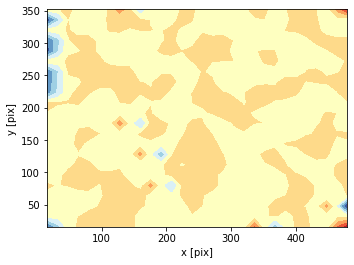

In [163]:
graphics.contour_plot(data.isel(t=0))

In [164]:
data.piv.vec2scal('ke')

(<xarray.Dataset>
 Dimensions:  (x: 30, y: 22, t: 1)
 Coordinates:
   * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
   * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
   * t        (t) int32 1
 Data variables:
     u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
     v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
     chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
     w        (y, x, t) float64 0.07076 28.32 33.84 37.17 ... 27.9 27.77 0.01667
 Attributes:
     variables:  ['x', 'y', 'u', 'v', 'ke']
     units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '(pix/dt)^2']
     dt:         None
     files:      c:\users\alex\repos\pivpy\pivpy\data\openpiv\exp1_001_b.txt,
 <xarray.Dataset>
 Dimensions:  (x: 30, y: 22, t: 1)
 Coordinates:
   * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
   * y        (y) float64 16.0 32.0 48.0 64

In [165]:
data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int32 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.07076 28.32 33.84 37.17 ... 27.9 27.77 0.01667
Attributes:
    variables:  ['x', 'y', 'u', 'v', 'ke']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '(pix/dt)^2']
    dt:         None
    files:      c:\users\alex\repos\pivpy\pivpy\data\openpiv\exp1_001_b.txt

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [pix]', ylabel='y [pix]'>)

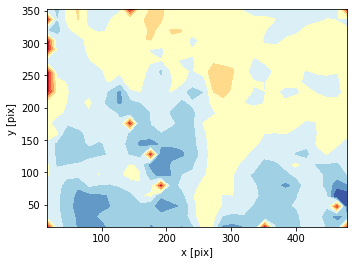

In [166]:
graphics.contour_plot(data.isel(t=0))

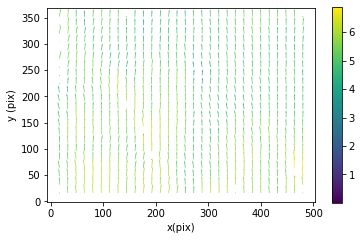

In [167]:
fig,ax = data.piv.quiver(colbar=True)
# fig.set_size_inches(11,10)

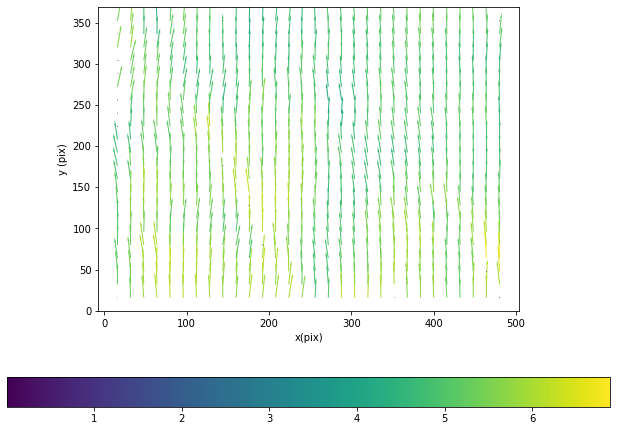

In [168]:
fig,ax = graphics.quiver(data.isel(t=-1),colbar=True,colbar_orient='horizontal',arrScale=15)
fig.set_size_inches(12,8)